In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing

## Preprocessing Work

In [144]:
data = pd.read_excel("Concrete_Data.xls")
shortenedCols = ["Cement", "Slag", "Ash", "Water", "Superplasticizer", "Coarse", "Fine", "Age", "Strength"]
newCols = dict(zip(data.columns, shortenedCols))

renamed = data.rename(columns=newCols)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [145]:
train_size = 900/renamed.shape[0]
assert(train_size == 900/1030)

y = renamed["Strength"]
X = renamed.drop(columns="Strength")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=train_size)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [146]:
scaler = sklearn.preprocessing.StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_norm = np.array(X_scaler.transform(X_train))
X_test_norm = np.array(X_scaler.transform(X_test))

y_scaler = sklearn.preprocessing.StandardScaler()
y_scaler.fit(y_train.reshape(-1, 1))
y_train_norm = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test_norm = y_scaler.transform(y_test.reshape(-1, 1)).ravel()


In [147]:
# This function was used to generate the plots in the report
# I have disabled its execution to save space in the final report

def feature_dist(df):
    for feature in shortenedCols:
        plt.figure(figsize=(3, 2))
        plt.hist(df[feature], bins=50)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# feature_dist(renamed)

## Gradient Descent Algorithm

In [148]:
def gradient_descent(X, y, learning_rate, iterations):
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1])
    for _ in range(iterations):
        error = np.dot(X, theta.T) - y
        gradient = (2 / len(y)) * np.dot(X.T, error)
        theta = theta - (learning_rate * gradient)

    return theta

### Univariate Model

For each feature, we calculate the unnormalized and normalized theta values. Before running the gradient descent algorithm, we concatenate a column of 1s before our feature to account for the "constant" offset term. Therefore, we get two theta values back per run. The first corresponds to the constant, and the second corresponds to the scale of the first feature.

It's important to note the difference in learning rate between the unnormalized and normalized values. Because of the larger unnormalzied values, running the algorithm with a larger learning rate will cause our numbers to overflow. This is partially accounted for by increasing the number of iterations. 

In [149]:
thetas = np.zeros([8,2])
norm_thetas = np.zeros([8, 2])
for i in range(8):
    target = np.array(X_train[:, i]).reshape(-1,1)
    thetas[i] = gradient_descent(target, y_train, 0.000001, 1000)

    norm_target = np.array(X_train_norm[:, i]).reshape(-1,1)
    norm_thetas[i] = gradient_descent(norm_target, y_train_norm, 0.005, 10000)
    
print(thetas)
print(norm_thetas)

[[0.0034637  0.12030553]
 [0.03997999 0.21899004]
 [0.04575242 0.25362762]
 [0.00310929 0.19011898]
 [0.06798608 0.47597249]
 [0.00096533 0.03601923]
 [0.00141427 0.04509721]
 [0.04412275 0.3226835 ]]
[[ 5.55308885e-17  5.02343218e-01]
 [ 1.38733469e-16  1.46692528e-01]
 [ 1.28356585e-16 -1.12944599e-01]
 [-3.46991571e-16 -2.87010654e-01]
 [ 1.52643330e-16  3.66130334e-01]
 [ 2.86180955e-16 -1.71369193e-01]
 [ 2.49810049e-16 -1.75216548e-01]
 [ 1.21386851e-16  3.30158472e-01]]


## Multivariate Model

This uses the exact same function defined above, yet the entire input is passed to the gradient descent algorithm instead of just a single feature. We expect the output of each function to be a 1x9 array, accounting for the extra constant column of 1s.

In [150]:
multivar_thetas = gradient_descent(X_train, y_train, 0.0000001, 10000)
multivar_norm_thetas = gradient_descent(X_train_norm, y_train_norm, 0.01, 1000)

print(multivar_thetas)
print(multivar_norm_thetas)

[-4.94565987e-05  1.17061494e-01  9.58321104e-02  8.95407190e-02
 -1.34837471e-01  3.34834230e-02  7.90934998e-04  1.21552682e-02
  1.04428152e-01]
[-3.87443164e-16  5.73305067e-01  3.59729574e-01  1.79375515e-01
 -3.32187173e-01  8.88597157e-02 -5.12532722e-02 -7.57791740e-02
  4.21943592e-01]


## Training Model Performance


In [151]:
def predict(X, thetas):
    preds = np.dot(X, thetas.T)
    return preds

def mse(y, y_pred):
    return np.sum(np.square(y - y_pred)) / np.size(y)

In [152]:
print("Performance on Training Dataset")
print("RSquared\t\t MSE\t\t Variance")

X_multivar_train = np.c_[np.ones(X_train.shape[0]), X_train]
y_pred = predict(X_multivar_train, multivar_thetas)
MSE = mse(y_train, y_pred)
var = np.var(y_train)
rsquared = 1 - (MSE/var)
print(f"{rsquared}, {MSE}, {var} = Unnormalized Multivariate R^2")

X_multivar_norm_train = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
y_pred = predict(X_multivar_norm_train, multivar_norm_thetas)
MSE = mse(y_train_norm, y_pred)
var = np.var(y_train_norm)
rsquared = 1 - (MSE/var)
print(f"{rsquared}, {MSE}, {var} = Normalized Multivariate R^2\n")


for i in range(8):
    target = np.c_[np.ones((X_train.shape[0], 1)), X_train[:,i]]
    y_pred = predict(target, thetas[i])
    MSE = mse(y_train, y_pred)
    var = np.var(y_train)
    rsquared = 1 - (MSE/var)
    print(f"{rsquared}, {MSE}, {var} = R^2 for Unnormalized Feature {shortenedCols[i]}")

print("")

for i in range(8):
    target = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm[:,i]]
    y_pred = predict(target, norm_thetas[i])
    MSE = mse(y_train_norm, y_pred)
    var = np.var(y_train_norm)
    rsquared = 1 - (MSE/var)
    print(f"{rsquared}, {MSE}, {var} = R^2 for Normalized Feature {shortenedCols[i]}")

Performance on Training Dataset
RSquared		 MSE		 Variance
0.6056716878185033, 110.91766254069823, 281.28252299988645 = Unnormalized Multivariate R^2
0.6143422909001132, 0.38565770909988684, 1.0 = Normalized Multivariate R^2

0.18211356369270126, 230.05716033190294, 281.28252299988645 = R^2 for Unnormalized Feature Cement
-2.2763111974318657, 921.5690797464143, 281.28252299988645 = R^2 for Unnormalized Feature Slag
-2.87211977997769, 1089.15962106989, 281.28252299988645 = R^2 for Unnormalized Feature Ash
-0.20024187017790296, 337.60706145374274, 281.28252299988645 = R^2 for Unnormalized Feature Water
-3.664915222607407, 1312.1591233955883, 281.28252299988645 = R^2 for Unnormalized Feature Superplasticizer
-0.08772754903166602, 305.9587493281097, 281.28252299988645 = R^2 for Unnormalized Feature Coarse
-0.12338612287634709, 315.98888294571935, 281.28252299988645 = R^2 for Unnormalized Feature Fine
-2.2268732003673697, 907.6630352000519, 281.28252299988645 = R^2 for Unnormalized Feature A

## Testing Model Performance

In [153]:
print("Performance on Testing Dataset")
print("RSquared\t\t MSE\t\t Variance")

X_multivar_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = predict(X_multivar_test, multivar_thetas)
MSE = mse(y_test, y_pred)
var = np.var(y_test)
rsquared = 1 - (MSE/var)
print(f"{rsquared}, {MSE}, {var} = Unnormalized Multivariate R^2")

X_multivar_norm_test = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]
y_pred = predict(X_multivar_norm_test, multivar_norm_thetas)
MSE = mse(y_test_norm, y_pred)
var = np.var(y_test_norm)
rsquared = 1 - (MSE/var)
print(f"{rsquared}, {MSE}, {var} = Normalized Multivariate R^2\n")


for i in range(8):
    target = np.c_[np.ones((X_test.shape[0], 1)), X_test[:,i]]
    y_pred = predict(target, thetas[i])
    MSE = mse(y_test, y_pred)
    var = np.var(y_test)
    rsquared = 1 - (MSE/var)
    print(f"{rsquared}, {MSE}, {var} = R^2 for Unnormalized Feature {shortenedCols[i]}")

print("")

for i in range(8):
    target = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm[:,i]]
    y_pred = predict(target, norm_thetas[i])
    MSE = mse(y_test_norm, y_pred)
    var = np.var(y_test_norm)
    rsquared = 1 - (MSE/var)
    print(f"{rsquared}, {MSE}, {var} = R^2 for Normalized Feature {shortenedCols[i]}")

Performance on Testing Dataset
RSquared		 MSE		 Variance
0.5537961158499328, 114.75321894547034, 257.1766473168498 = Unnormalized Multivariate R^2
0.5717923301901839, 0.39151032813045994, 0.9143001298980588 = Normalized Multivariate R^2

0.05295064793759763, 243.5589772070036, 257.1766473168498 = R^2 for Unnormalized Feature Cement
-2.9789647029597193, 1023.2968020992658, 257.1766473168498 = R^2 for Unnormalized Feature Slag
-3.0935869602781816, 1052.7749699443173, 257.1766473168498 = R^2 for Unnormalized Feature Ash
-0.26953186303719656, 326.4939481978204, 257.1766473168498 = R^2 for Unnormalized Feature Water
-4.584213974528381, 1436.1294278691096, 257.1766473168498 = R^2 for Unnormalized Feature Superplasticizer
-0.08806069419969553, 279.82380141152186, 257.1766473168498 = R^2 for Unnormalized Feature Coarse
-0.1341197658079767, 291.66911902626634, 257.1766473168498 = R^2 for Unnormalized Feature Fine
-2.6874385052329544, 948.3230719628674, 257.1766473168498 = R^2 for Unnormalized F

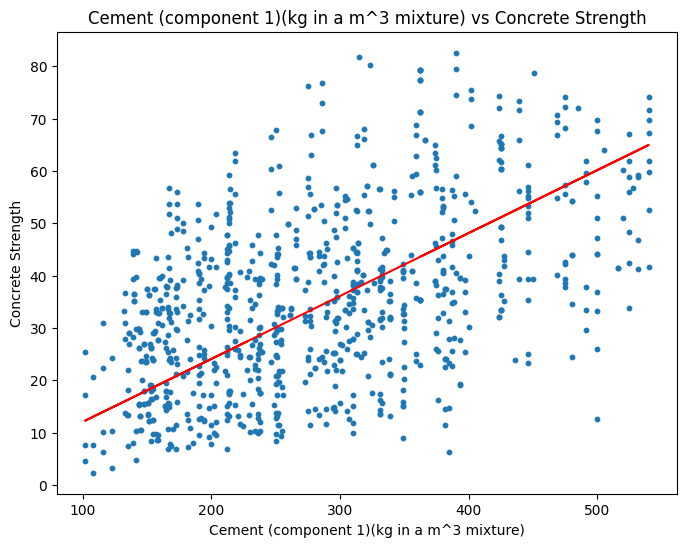

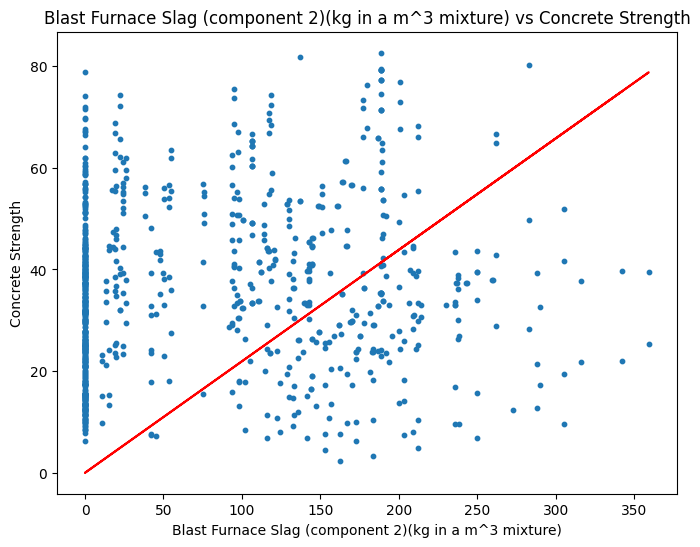

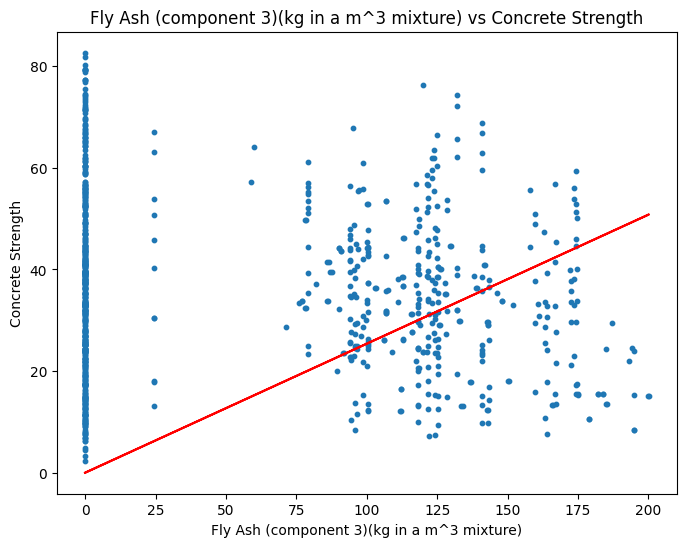

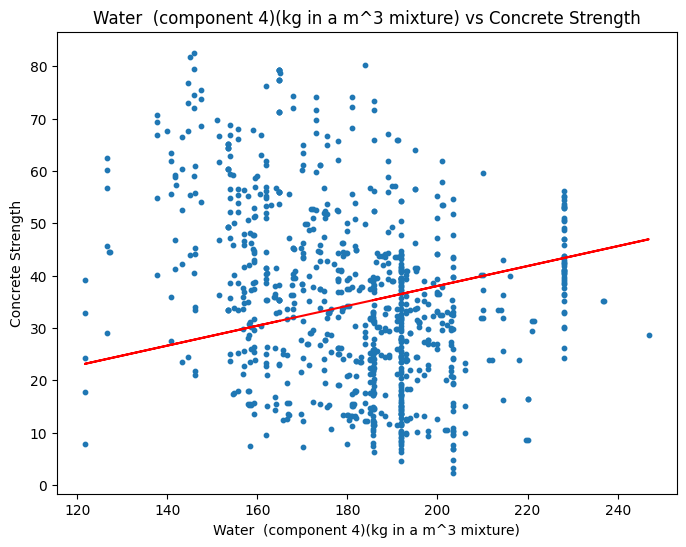

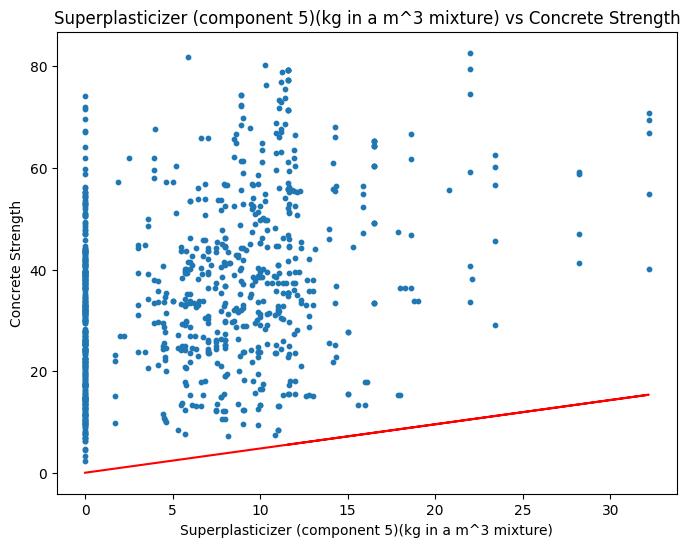

In [155]:
for i in range(8):
    target = np.array(X_train[:, i])
    plt.figure(figsize=(8, 6))
    plt.scatter(target, y_train, s=10)
    plt.plot(target, np.dot(np.c_[np.ones(target.shape), target], thetas[i].T), color='r')
    plt.xlabel(data.columns[i])
    plt.ylabel('Concrete Strength')
    plt.title(data.columns[i] + " vs Concrete Strength")
    plt.show()
